A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.

This is a basic time series dataset, with only the date ("dd/mm/yyyy" format), and the number of births. There are 365 records in total.

In [0]:
# import modules
import pandas as pd

# load data set
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [2]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


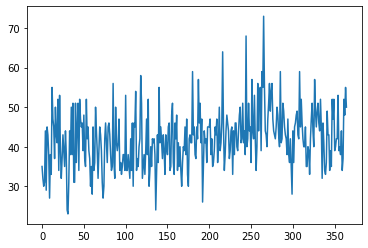

In [3]:
df['Births'].plot()

In [4]:
df.index

RangeIndex(start=0, stop=365, step=1)

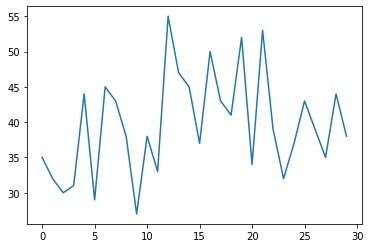

In [5]:
# plot the range 0 to 31
df[0:30]['Births'].plot()

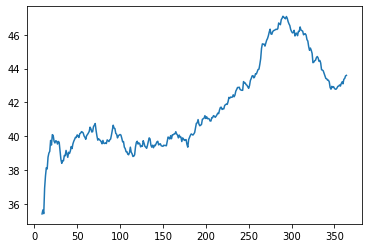

In [6]:
#Rolling mean for births 
df['Births'].rolling(min_periods = 10, window=60, center=False).mean().plot()

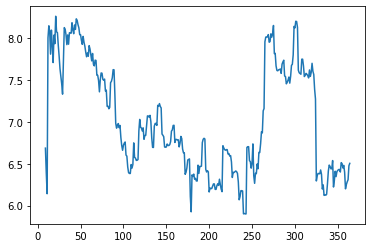

In [7]:
#Rolling standard deviations for births 
df['Births'].rolling(min_periods = 10, window=60, center=False).std().plot()

In [9]:
# let's play around with some if statements

# Let's do a silly one
df.loc[df['Date'] == '1959-07-02', 'birthday'] = 'TRUE'
df.loc[df['Date'] != '1959-07-02', 'birthday'] = 'FALSE'
df[df['birthday'] == 'TRUE'].head()



,Date,Births,birthday
182,1959-07-02,45,TRUE
